In [1]:
#!pip freeze

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#!pip install google-cloud

In [4]:
# %bash
# apt-get update
# apt-get -y install python-mpltoolkits.basemap

In [5]:
%bigquery schema --table brooklyn_homes.2013_housing_sales

In [6]:
%bigquery schema --table brooklyn_homes.2017_housing_sales

In [7]:
%bigquery schema --table brooklyn_homes.2016_housing_sales

In [8]:
%bigquery schema --view refined-window-228202:brooklyn_homes.brooklyna

In [9]:
import google.datalab.bigquery as bq
sql = """
select SALE_PRICE , GROSS_SQUARE_FEET ,TAX_CLASS_AT_TIME_OF_SALE ,NEIGHBORHOOD  from `brooklyn_homes.brooklyna` 
"""
df = bq.Query(sql).execute().result().to_dataframe()


In [10]:
temp = df.isnull().sum(axis = 0) #Number of NAs from each column
temp

SALE_PRICE                   1694
GROSS_SQUARE_FEET            1704
TAX_CLASS_AT_TIME_OF_SALE    1694
NEIGHBORHOOD                 1694
dtype: int64

In [11]:
df.shape[0]

347066

In [12]:
4*(temp['GROSS_SQUARE_FEET']/df.shape[0])*100

1.9638915941060202

If we assume that the number of nulls form an mutually exclusive set i.e for any datapoint having null value, has only one feature as null, the maximum number of data-points that that can be ignored is 4 times the maximum-number of null values of a feature (in this case GROSS_SQUARE_FEET).
This forms less than 2 percent of the data.
So we can safely conclude that atleast <b>98.04 percent</b> of the data is clean.
However, we are assuming here that null values are evenly distributed throughout the data without any relation to any of the features used.i.e the data is not skewed

<h3>Beginning exploration - Viewing the first few observations of the dataframe and distributions of the data

In [13]:
df.head()

,SALE_PRICE,GROSS_SQUARE_FEET,TAX_CLASS_AT_TIME_OF_SALE,NEIGHBORHOOD
0,982611.0,NaN,2.0,BEDFORD STUYVESANT
1,813581.0,NaN,2.0,BEDFORD STUYVESANT
2,784090.0,NaN,2.0,BEDFORD STUYVESANT
3,766935.0,NaN,2.0,BEDFORD STUYVESANT
4,1634291.0,NaN,2.0,BEDFORD STUYVESANT


In [14]:
df.describe()

,SALE_PRICE,GROSS_SQUARE_FEET,TAX_CLASS_AT_TIME_OF_SALE
count,3.453720e+05,3.453620e+05,345372.000000
mean,4.803584e+05,3.101535e+03,1.647178
std,2.644632e+06,1.566985e+04,0.915807
min,0.000000e+00,0.000000e+00,1.000000
25%,0.000000e+00,0.000000e+00,1.000000
50%,2.600000e+05,1.848000e+03,1.000000
75%,5.700000e+05,3.000000e+03,2.000000
max,8.696129e+08,2.548000e+06,4.000000


Exploring the tables that did not successfully join into the combined view - tables for years 2013,2016,2017

In [15]:
sql = ''' 
SELECT _SALE_PRICE__ ,GROSS_SQUARE_FEET_ ,TAX_CLASS_AT_TIME_OF_SALE_ , NEIGHBORHOOD_  
FROM `brooklyn_homes.2013_housing_sales` 
'''
df1 = bq.Query(sql).execute().result().to_dataframe()

In [16]:
df1.describe()

,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_
count,2.484200e+04,24842.000000
mean,3.088459e+03,1.681869
std,1.841045e+04,0.911237
min,0.000000e+00,1.000000
25%,0.000000e+00,1.000000
50%,1.790000e+03,1.000000
75%,3.000000e+03,2.000000
max,1.324592e+06,4.000000


In [17]:
df1.head()

,_SALE_PRICE__,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_,NEIGHBORHOOD_
0,$-,28400.0,2.0,BATH BEACH
1,"$4,050,000.00",27000.0,2.0,BATH BEACH
2,$-,8760.0,2.0,BATH BEACH
3,$-,42720.0,2.0,BATH BEACH
4,"$2,000,000.00",17800.0,2.0,BAY RIDGE


In [18]:
sql = '''SELECT SALE_PRICE_ ,GROSS_SQUARE_FEET_ ,TAX_CLASS_AT_TIME_OF_SALE_ ,
NEIGHBORHOOD_  FROM `brooklyn_homes.2016_housing_sales` '''
df2 = bq.Query(sql).execute().result().to_dataframe()
df2.head()

,SALE_PRICE_,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_,NEIGHBORHOOD_
0,-,"24,880",2,BAY RIDGE
1,-,"24,880",2,BAY RIDGE
2,"4,600,000","17,280",2,BAY RIDGE
3,"1,845,000","7,740",2,BAY RIDGE
4,"6,400,000","12,609",2,BAY RIDGE


In [19]:
sql = '''SELECT SALE_PRICE_ ,GROSS_SQUARE_FEET_ ,
TAX_CLASS_AT_TIME_OF_SALE_ , NEIGHBORHOOD_  FROM `brooklyn_homes.2017_housing_sales` '''
df3 = bq.Query(sql).execute().result().to_dataframe()
df3.head()

,SALE_PRICE_,GROSS_SQUARE_FEET_,TAX_CLASS_AT_TIME_OF_SALE_,NEIGHBORHOOD_
0,0,"43,600",2,BATH BEACH
1,0,"12,160",2,BAY RIDGE
2,3410000,"12,160",2,BAY RIDGE
3,4850000,"12,000",2,BAY RIDGE
4,5300000,"12,001",2,BAY RIDGE


In [20]:
df.dtypes

SALE_PRICE                   float64
GROSS_SQUARE_FEET            float64
TAX_CLASS_AT_TIME_OF_SALE    float64
NEIGHBORHOOD                  object
dtype: object

In [21]:
df1.dtypes

_SALE_PRICE__                  object
GROSS_SQUARE_FEET_            float64
TAX_CLASS_AT_TIME_OF_SALE_    float64
NEIGHBORHOOD_                  object
dtype: object

In [22]:
df2.dtypes

SALE_PRICE_                   object
GROSS_SQUARE_FEET_            object
TAX_CLASS_AT_TIME_OF_SALE_     int64
NEIGHBORHOOD_                 object
dtype: object

In [23]:
df3.dtypes

SALE_PRICE_                    int64
GROSS_SQUARE_FEET_            object
TAX_CLASS_AT_TIME_OF_SALE_     int64
NEIGHBORHOOD_                 object
dtype: object

In [24]:
df1=df1.rename(index=str,columns ={"_SALE_PRICE__":"SALE_PRICE","TAX_CLASS_AT_TIME_OF_SALE_":"TAX_CLASS_AT_TIME_OF_SALE",
                               "GROSS_SQUARE_FEET_":"GROSS_SQUARE_FEET","NEIGHBORHOOD_":"NEIGHBORHOOD"})
df2=df2.rename(index=str,columns ={"SALE_PRICE_":"SALE_PRICE","TAX_CLASS_AT_TIME_OF_SALE_":"TAX_CLASS_AT_TIME_OF_SALE",
                              "GROSS_SQUARE_FEET_":"GROSS_SQUARE_FEET","NEIGHBORHOOD_":"NEIGHBORHOOD"})
df3=df3.rename(index=str,columns ={"SALE_PRICE_":"SALE_PRICE","TAX_CLASS_AT_TIME_OF_SALE_":"TAX_CLASS_AT_TIME_OF_SALE",
                              "GROSS_SQUARE_FEET_":"GROSS_SQUARE_FEET","NEIGHBORHOOD_":"NEIGHBORHOOD"})

In [25]:
sql = '''select round(avg(SALE_PRICE),3) as AVG_SALE_PRICE,2019-YEAR_BUILT as age from `brooklyn_homes.brooklyna` where YEAR_BUILT > 2002 
group by age having AVG_SALE_PRICE<>0 order by AVG_SALE_PRICE desc
'''
df4 =  bq.Query(sql).execute().result().to_dataframe()

In [26]:
df4

,AVG_SALE_PRICE,age
0,1185601.823,5
1,1157770.066,4
2,1080826.595,6
3,829094.213,3
4,792131.270,2
5,711269.461,7
6,651446.280,10
7,594361.955,11
8,590764.660,1
9,588616.028,8


<h4>Visual #1. Graphing Average Sale Price as a function of Property Age</h4>
The plot clearly shows that as the age of a property increases, the sale price of the property decreases

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


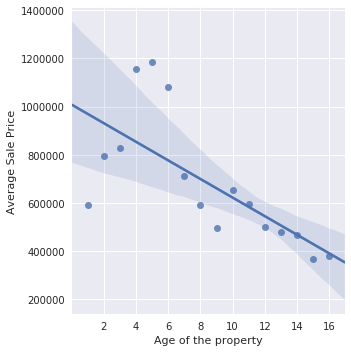

In [27]:
#y_pos = np.arange(len(objects))
ax = sns.lmplot(x="age", y="AVG_SALE_PRICE", data=df4)
ax.set(xlabel='Age of the property', ylabel='Average Sale Price')
plt.show()

In [28]:
# sql ="""select TOTAL_UNITS ,2019-YEAR_BUILT as age
# from `brooklyn_homes.brooklyna`  where YEAR_BUILT > 2002 and TOTAL_UNITS is not NULL order by age desc"""

In [29]:
sql = '''select SALE_PRICE,GROSS_SQUARE_FEET 
 from `brooklyn_homes.brooklyna` where LAND_SQUARE_FEET is not null and GROSS_SQUARE_FEET is not null 
and GROSS_SQUARE_FEET <> 0 and GROSS_SQUARE_FEET< 500000 and SALE_PRICE>50000 order by SALE_PRICE desc 
'''
df5 = bq.Query(sql).execute().result().to_dataframe()

<h4>Visual #2. Scatterplot of Sale Price as a function of property Gross Square Feet. </h4>
Confirms our intuition of a generally linear relationship. Shows that most observations are clustered around the smaller square footage range. 

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


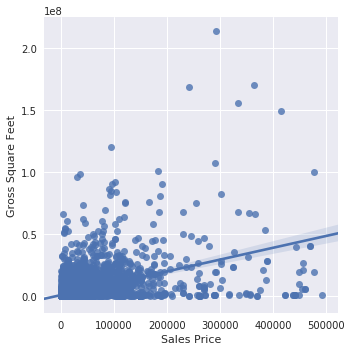

In [30]:
#ax = sns.lmplot(x="SALE_PRICE", y="divo", data=df4)
ax = sns.lmplot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',data=df5)
ax.set(xlabel='Sales Price', ylabel='Gross Square Feet')
plt.show()

<h4>Digging deeper into the smaller property</h4>

In [31]:
sql = '''select SALE_PRICE,GROSS_SQUARE_FEET 
 from `brooklyn_homes.brooklyna` where LAND_SQUARE_FEET is not null and GROSS_SQUARE_FEET is not null 
and GROSS_SQUARE_FEET <> 0 and GROSS_SQUARE_FEET< 1000 and SALE_PRICE<540000 and SALE_PRICE<>0 order by SALE_PRICE desc 
'''
df5 = bq.Query(sql).execute().result().to_dataframe()


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


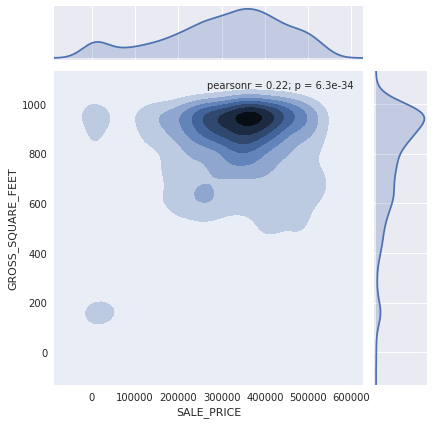

In [32]:
# Custom the histogram and add rug:
sns.jointplot(x=df5["SALE_PRICE"], y=df5["GROSS_SQUARE_FEET"], kind='kde')

For the smaller units, the pearsonr coefficient is around 0.22. This indicates a weak linear relationship between Gross Square Feet and Sales Price. Certainly, this graph indicates that gross Square feet is not the real indicator of the price. There are many more features such as type of school, basic anemities, connectivity, transportation that determine the price of the property

In [33]:
sql = """
select SALE_PRICE , GROSS_SQUARE_FEET ,LAND_SQUARE_FEET  from `brooklyn_homes.brooklyna` 
"""
df6 = bq.Query(sql).execute().result().to_dataframe()

<h4>Visual #3. Heatmap of correlations among explanatory variables.</h4>
We use this to identify interactions among the explanatory variables in our model, to avoid collinearity problems. 

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


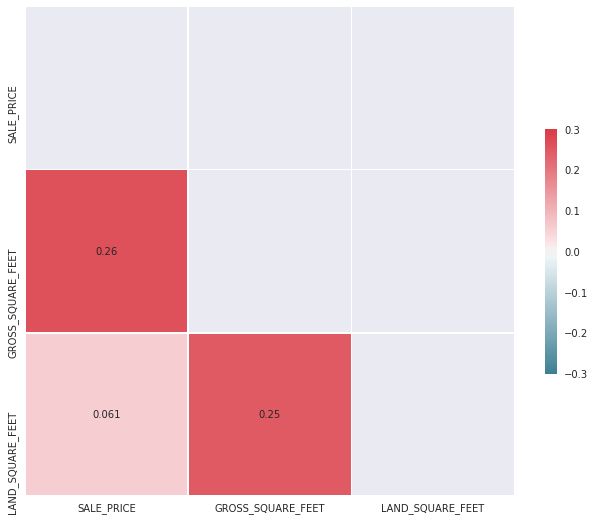

In [34]:
corr = df6.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
sql = """
select round(avg(SALE_PRICE),2) AVG_SALE_PRICE ,NEIGHBORHOOD from `brooklyn_homes.brooklyna`
group by NEIGHBORHOOD order by AVG_SALE_PRICE desc   LIMIT 20
"""
df7 = bq.Query(sql).execute().result().to_dataframe()

In [42]:
#!pip install WordCloud

In [43]:
#!pip install STOPWORDS

In [41]:
from wordcloud import WordCloud, STOPWORDS
df7['NEIGHBORHOOD'] = df7['NEIGHBORHOOD'].map(lambda x:x.strip())
df8 = df7.set_index('NEIGHBORHOOD').to_dict()
df8['AVG_SALE_PRICE']


{'BOERUM HILL': 1850729.51,
 'BROOKLYN HEIGHTS': 1661176.09,
 'BROOKLYN-UNKNOWN': 1291707.98,
 'BUSH TERMINAL': 7760088.23,
 'COBBLE HILL': 1775665.17,
 'DOWNTOWN-FULTON FERRY': 2202786.25,
 'DOWNTOWN-FULTON MALL': 1251379.75,
 'DOWNTOWN-METROTECH': 3158885.81,
 'GOWANUS': 3451808.57,
 'GREENPOINT': 1430584.81,
 'JAMAICA BAY': 14150000.0,
 'KENSINGTON': 1834431.25,
 'NAVY YARD': 2150119.71,
 'PARK SLOPE': 1300743.61,
 'PROSPECT HEIGHTS': 1931948.17,
 'RED HOOK': 7117272.0,
 'SPRING CREEK': 45284718.6,
 'WILLIAMSBURG-EAST': 1274423.18,
 'WILLIAMSBURG-NORTH': 1387250.46,
 'WILLIAMSBURG-SOUTH': 1302580.43}

In [44]:
def random_color_func(word = None,font_size= None,position= None,orientation=None,font_path = None,random_state = None):
    h = int(360.0*tone/255.0);
    s = int(100.0*255.0/255.0);
    l = int(100.0*float(random_state.randint(70,120))/255.0)
    return "hsl({},{}%,{}%)".format(h,s,l)

<h4>Visual #4. Wordcloud of of Brooklyn Neighborhoods by average Sale Price. </h4>
Reveals what neighborhoods would typically have the most expensive properties.

(-0.5, 399.5, 199.5, -0.5)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


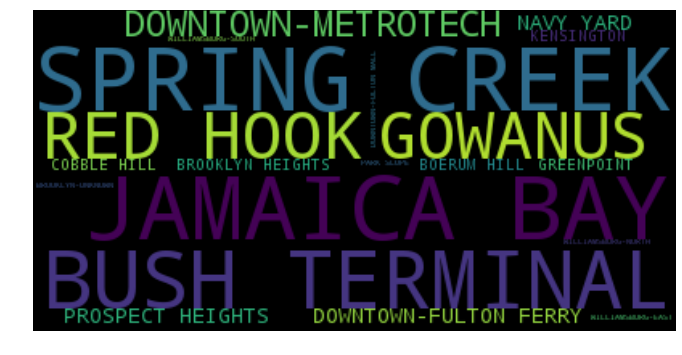

In [45]:
wordcloud = WordCloud(background_color = 'Black',
                      relative_scaling =0)
fig = plt.figure(1,figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
wordcloud.generate_from_frequencies(df8['AVG_SALE_PRICE']);
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.axis('off')

In [46]:
Dsql = """
select SALE_PRICE , GROSS_SQUARE_FEET ,TAX_CLASS_AT_TIME_OF_SALE ,NEIGHBORHOOD, YEAR_BUILT, SALE_DATE  from `brooklyn_homes.brooklyna` 
Where SALE_PRICE <> 0 and SALE_PRICE < 50000000 and SALE_PRICE is not NULL and GROSS_SQUARE_FEET is not NULL and GROSS_SQUARE_FEET <>0 and TAX_CLASS_AT_TIME_OF_SALE is not NULL and  NEIGHBORHOOD is not NULL"""
df = bq.Query(Dsql).execute().result().to_dataframe()

In [ ]:
# df = np.random.rand(100, 5)
# training_idx = np.random.randint(df.shape[0], size=80)
# test_idx = np.random.randint(df.shape[0], size=20)
# training, test = df[training_idx,:], df[test_idx,:]

In [48]:
# training
from sklearn.model_selection import train_test_split


In [51]:
sql = """
select SALE_PRICE , GROSS_SQUARE_FEET ,2019-YEAR_BUILT as AGE ,NEIGHBORHOOD  from `brooklyn_homes.brooklyna` where GROSS_SQUARE_FEET is not NULL
and GROSS_SQUARE_FEET <> 0 and SALE_PRICE <> 0 and YEAR_BUILT<>0 and SALE_PRICE <> 1
"""
df11 = bq.Query(sql).execute().result().to_dataframe()
df11.head(4)

,SALE_PRICE,GROSS_SQUARE_FEET,AGE,NEIGHBORHOOD
0,1555000,12600,90,BATH BEACH
1,600000,4875,92,BEDFORD STUYVESANT
2,4100000,24800,97,BENSONHURST
3,2100000,14240,95,BOROUGH PARK


Total unique neighborhoods in the dataset

In [49]:
len(df.NEIGHBORHOOD.unique())

122

Exporting the dataset as CSV file so that other teammates can work individually on the data

In [53]:
from pandas import DataFrame
data = DataFrame(df11)
data.to_csv("Data.csv", index = None , header = True)

The next few cells performs linear regression using one-hot encoding on the neighbourhoods.
Considering the third column for performing one-hot encoding on neighbourhoods

In [54]:
x = df11.iloc[:,3:]
x.shape

(135319, 1)

In [56]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x = labelencoder.fit_transform(x)
x = x.reshape(-1,1)
print(x.shape)
onehotencoder = OneHotEncoder(sparse=False)
x1 = onehotencoder.fit_transform(x)

(135319, 1)


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
x1.shape

(135319, 122)

In [59]:
df11.head(4)

,SALE_PRICE,GROSS_SQUARE_FEET,AGE,NEIGHBORHOOD
0,1555000,12600,90,BATH BEACH
1,600000,4875,92,BEDFORD STUYVESANT
2,4100000,24800,97,BENSONHURST
3,2100000,14240,95,BOROUGH PARK


In [60]:
x2 = df11.iloc[:,:3]
x2.head()
x2 = x2.values
x2.shape


(135319, 3)

In [61]:
x2

array([[1555000,   12600,      90],
       [ 600000,    4875,      92],
       [4100000,   24800,      97],
       ...,
       [1150000,    3200,     120],
       [3545000,    5375,     120],
       [ 770000,    2700,     120]])

In [62]:
xfinal = np.hstack((x2,x1))
xfinal.shape
          

(135319, 125)

This is the final dataset. It contains 3 original columns as well as the 122 other neighbourhoods, in total 125

In [63]:
xfinal

array([[1.555e+06, 1.260e+04, 9.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.000e+05, 4.875e+03, 9.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.100e+06, 2.480e+04, 9.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.150e+06, 3.200e+03, 1.200e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.545e+06, 5.375e+03, 1.200e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.700e+05, 2.700e+03, 1.200e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [64]:
X = df11.iloc[:,1:3]
X = X.values
X = np.hstack((X,x1))
X.shape

(135319, 124)

In [65]:
X

array([[12600.,    90.,     0., ...,     0.,     0.,     0.],
       [ 4875.,    92.,     0., ...,     0.,     0.,     0.],
       [24800.,    97.,     0., ...,     0.,     0.,     0.],
       ...,
       [ 3200.,   120.,     0., ...,     0.,     0.,     0.],
       [ 5375.,   120.,     0., ...,     0.,     0.,     0.],
       [ 2700.,   120.,     0., ...,     0.,     0.,     0.]])

Defining the target label as Sales Price which is the zeroth column of the dataframe

In [68]:
T = df11.iloc[:,0].values
T.shape

(135319,)

In [69]:
T= T.reshape(-1,1)
T.shape

(135319, 1)

Dividing the dataset into training and test data

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.25, random_state=0)

In [73]:
X_train.shape, T_train.shape, X_test.shape, T_test.shape

((101489, 124), (101489, 1), (33830, 124), (33830, 1))

Defining the linear regression model

In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, T_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [76]:
y_pred = regressor.predict(X_test)

In [77]:
y_pred

array([[ 477958.54437219],
       [ 400673.63722127],
       [ 473241.60182086],
       ...,
       [3984631.35920328],
       [ 682845.39922748],
       [ 637375.22879923]])

In [78]:
T_test

array([[1100000],
       [ 370000],
       [ 386000],
       ...,
       [6178000],
       [ 730000],
       [ 525000]])

In [80]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(T_test, y_pred))

In [81]:
rmse

4827997.987454857

The rmse obtained in the previous step is very large. Probably normalisation could help 

In [83]:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

Defining normalised data sets

In [84]:
X_train_n = normalize(X_train)
X_test_n = normalize(X_test)


In [85]:
reg_n = LinearRegression()
reg_n.fit(X_train_n,T_train)
y_pred_n = reg_n.predict(X_test_n)
#rmse(T_test,y_pred_n)

In [86]:
import math
rmse_n = math.sqrt(mean_squared_error(T_test,y_pred_n))
rmse_n

6195001.806397387

Here we can see that normalisation have worsened the results

In [87]:
def rmse(T, Y):
    return np.sqrt(np.mean((T-Y)**2))

In [88]:
rmse_n = rmse(T_test,y_pred_n)
rmse_n

6195001.806397387

Using LMS predictor for experimentation
credits: Thanks to my roommate <b>Shubham Gupta</b> for providing me with the code

In [89]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [90]:
import collections # for checking iterable instance
import copy

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.w = None
    
    # batch training by using train_step function
    def train(self, X, T):
        X1 = super().add_ones(X)
        self.w = np.zeros((1,X1.shape[1]))
        max_iterations = 10
        for i in range(max_iterations):
            for k in range(X1.shape[0]):
                self.train_step(X1[k],T[k])
                
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        t = t.reshape((t.shape[0],1))
        if self.w is None:
            x = np.reshape(x,(1,x.shape[0]))
            x = super().add_ones(x)
            self.w = np.zeros((1,x.shape[1]))
        else:
            x = np.reshape(x,(1,x.shape[0]))
        y = x @ self.w.T
        self.w -= self.alpha * (y - t) *  x
    
    # apply the current model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y = X1 @ self.w.T
        return y

In [91]:
#creating object for LMS class
lms_regressor = LMS(10)    #here 0.2 is alpha, the learning rate, randomly choosen as 0.2

#Train with X_train and T_train
lms_regressor.train(X_train,T_train)

#Use this model to predict sales for X_test
y_pred_lms = lms_regressor.use(X_test)
y_pred_lms

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in multiply


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

The LMS predictor doesn't seem to work.......kept for future development


From the above results we can see that linear regression model with large number of categorical varibales doesn't give accurate results.
The code below gives building the model based on random forests

Now trying an additional model: using the random forest ensemble method as a regressor model

In [94]:
DF11 = pd.read_csv("DF11.csv",header=0, sep = ',')

In [95]:
RFData = DF11[['SALE_PRICE', 'GROSS_SQUARE_FEET', 'AGE']]

In [96]:
x = RFData.drop('SALE_PRICE', axis='columns')
y = RFData['SALE_PRICE']

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
model = RandomForestRegressor(n_estimators=10, random_state=8675309, oob_score=True)
model.fit(x_train,y_train)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=8675309, verbose=0,
           warm_start=False)

This is the R-squared, a measure of how much variance in the dependent variable was explained by the independent variables.
The R-squared value is pretty decent 

In [101]:
model.score(x_test,y_test)


0.04292516131933788

In [104]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

This shows the ranking of the exaplanatory variables by the amount of variation in the dependent variable that they explain.
This is clearly in line with the heat map explained above

In [106]:
feature_importances

,importance
GROSS_SQUARE_FEET,0.701388
AGE,0.298612
